# Honors EDA work, Pavel Narnov
## Data analysis of house sales in King County
#### This is modified work for peers from Data Analysis course from IBM Data Science specialization
The dataset for the current lab contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| id            | A notation for a house                                                                                      |
| date          | Date house was sold                                                                                         |
| price         | Price is prediction target                                                                                  |
| bedrooms      | Number of bedrooms                                                                                          |
| bathrooms     | Number of bathrooms                                                                                         |
| sqft_living   | Square footage of the home                                                                                  |
| sqft_lot      | Square footage of the lot                                                                                   |
| floors        | Total floors (levels) in house                                                                              |
| waterfront    | House which has a view to a waterfront                                                                      |
| view          | Has been viewed                                                                                             |
| condition     | How good the condition is overall                                                                           |
| grade         | overall grade given to the housing unit, based on King County grading system                                |
| sqft_above    | Square footage of house apart from basement                                                                 |
| sqft_basement | Square footage of the basement                                                                              |
| yr_built      | Built Year                                                                                                  |
| yr_renovated  | Year when house was renovated                                                                               |
| zipcode       | Zip code                                                                                                    |
| lat           | Latitude coordinate                                                                                         |
| long          | Longitude coordinate                                                                                        |
| sqft_living15 | Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area |
| sqft_lot15    | LotSize area in 2015(implies-- some renovations)                                                            |


### Plan of data exploration:
0. Importing of libraries and dataset
1. Data Cleaning
2. Date formatting
3. EDA
4. Hypothesis testing
5. Conslusions

Firstly we are importing all necessary libraries and our dataset: 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
%matplotlib inline

In [2]:
file_name='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
df=pd.read_csv(file_name)
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### 1. Data Cleaning

Lets drop "unnamed" column and perform some EDA:

In [3]:
df.drop('Unnamed: 0', axis = 1, inplace = True)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


We see that we don't have any misleading column names now.
Lets perform some EDA.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21600 non-null  float64
 4   bathrooms      21603 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
df.isnull().sum()

id                0
date              0
price             0
bedrooms         13
bathrooms        10
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

We see that we have 'id' parameter which may be dropped and we have 2 variables with Null values (bedrooms and bathrooms) lets analize them before performing any actions:

In [6]:
df.drop('id', axis = 1, inplace = True)

In [7]:
df.bedrooms.value_counts()

3.0     9824
4.0     6882
2.0     2760
5.0     1601
6.0      272
1.0      199
7.0       38
8.0       13
9.0        6
10.0       3
11.0       1
33.0       1
Name: bedrooms, dtype: int64

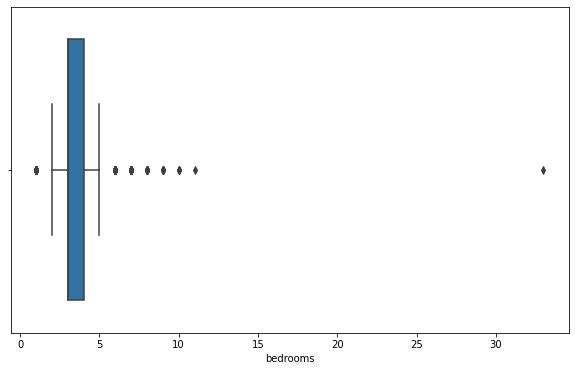

In [8]:
plt.figure(figsize = (10,6))
sns.boxplot(x = df.bedrooms)
plt.show()

Checking of values and boxplot shows us all values greater then 5 are outliers, due to the fact that we have so many outliers with so high varience it is better to replace Null values for bedrooms with median value.

In [9]:
print('Rounded mean value for number of bedrooms in house:', round(df.bedrooms.mean(),1))
print('Median value for number of bedrooms in house:', df.bedrooms.median())

Rounded mean value for number of bedrooms in house: 3.4
Median value for number of bedrooms in house: 3.0


Comparing of mean and median parameters for bedrooms doesn't shows huge difference but we should understand that we are unnable to have a flat with 3.4 bedrooms so we choose median value for this variable.

In [10]:
med_bed = df.bedrooms.median()
df['bedrooms'].replace(np.nan, med_bed, inplace = True)
df.bedrooms.isnull().sum()

0

In [11]:
df.bathrooms.unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75,  nan, 1.25, 5.25, 6.  , 0.5 ,
       5.5 , 6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

In [12]:
df.bathrooms.describe()

count    21603.000000
mean         2.115736
std          0.768996
min          0.500000
25%          1.750000
50%          2.250000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64

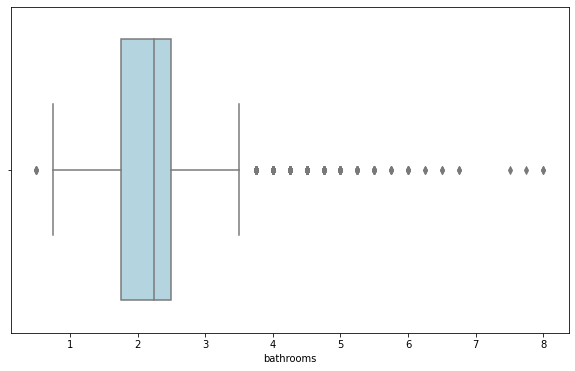

In [13]:
plt.figure(figsize = (10,6))
sns.boxplot(x = df.bathrooms, color = 'lightblue')
plt.show()

In [14]:
print('Mean value for number of bathrooms in house:', round(df.bathrooms.mean(),2))
print('Median value for number of bathrooms in house:', df.bathrooms.median())

Mean value for number of bathrooms in house: 2.12
Median value for number of bathrooms in house: 2.25


Here we also will use median value for bathrooms

In [15]:
med_bath = df.bathrooms.median()
df['bathrooms'].replace(np.nan, med_bath, inplace = True)
df.bathrooms.isnull().sum()

0

Final checking of null values:

In [22]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
month            0
day_of_month     0
day_of_week      0
dtype: int64

So we don't have null values after replacing.
Lets go futher

### 2. Date formatting:

We have our date in improper format. Lets transform it and receive additional columns: year, month, day of month, day of week

In [23]:
df.date.head(10)

0   2014-10-13
1   2014-12-09
2   2015-02-25
3   2014-12-09
4   2015-02-18
5   2014-05-12
6   2014-06-27
7   2015-01-15
8   2015-04-15
9   2015-03-12
Name: date, dtype: datetime64[ns]

We see that we have improper date format for data analysis. Lets fix it!

In [24]:
df['date'] = pd.to_datetime(df['date'], yearfirst = True)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,day_of_month,day_of_week
0,2014-10-13,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,...,1955,0,98178,47.5112,-122.257,1340,5650,10,13,Monday
1,2014-12-09,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,...,1951,1991,98125,47.7210,-122.319,1690,7639,12,9,Tuesday
2,2015-02-25,180000.0,2.0,1.00,770,10000,1.0,0,0,3,...,1933,0,98028,47.7379,-122.233,2720,8062,2,25,Wednesday
3,2014-12-09,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,...,1965,0,98136,47.5208,-122.393,1360,5000,12,9,Tuesday
4,2015-02-18,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,...,1987,0,98074,47.6168,-122.045,1800,7503,2,18,Wednesday


Extracting the year value:

In [25]:
df['year'] = pd.to_datetime(df['date'], yearfirst = True).dt.year
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,day_of_month,day_of_week,year
0,2014-10-13,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,...,0,98178,47.5112,-122.257,1340,5650,10,13,Monday,2014
1,2014-12-09,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,...,1991,98125,47.7210,-122.319,1690,7639,12,9,Tuesday,2014
2,2015-02-25,180000.0,2.0,1.00,770,10000,1.0,0,0,3,...,0,98028,47.7379,-122.233,2720,8062,2,25,Wednesday,2015
3,2014-12-09,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,...,0,98136,47.5208,-122.393,1360,5000,12,9,Tuesday,2014
4,2015-02-18,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,...,0,98074,47.6168,-122.045,1800,7503,2,18,Wednesday,2015


Extracting the month value:

In [26]:
df['month'] = pd.to_datetime(df['date'], format = '%Y-%m-%d').dt.month
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,day_of_month,day_of_week,year
0,2014-10-13,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,...,0,98178,47.5112,-122.257,1340,5650,10,13,Monday,2014
1,2014-12-09,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,...,1991,98125,47.7210,-122.319,1690,7639,12,9,Tuesday,2014
2,2015-02-25,180000.0,2.0,1.00,770,10000,1.0,0,0,3,...,0,98028,47.7379,-122.233,2720,8062,2,25,Wednesday,2015
3,2014-12-09,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,...,0,98136,47.5208,-122.393,1360,5000,12,9,Tuesday,2014
4,2015-02-18,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,...,0,98074,47.6168,-122.045,1800,7503,2,18,Wednesday,2015


In [27]:
df.month.max()

12

Max value in month column is 12 so we detected format of date correctly

Extracting the day of month and day of week:

In [28]:
df['day_of_month'] = pd.to_datetime(df['date'], format = '%Y-%m-%d').dt.day
df['day_of_week'] = pd.to_datetime(df['date'], format = '%Y-%m-%d').dt.day_name()
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,day_of_month,day_of_week,year
0,2014-10-13,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,...,0,98178,47.5112,-122.257,1340,5650,10,13,Monday,2014
1,2014-12-09,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,...,1991,98125,47.7210,-122.319,1690,7639,12,9,Tuesday,2014
2,2015-02-25,180000.0,2.0,1.00,770,10000,1.0,0,0,3,...,0,98028,47.7379,-122.233,2720,8062,2,25,Wednesday,2015
3,2014-12-09,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,...,0,98136,47.5208,-122.393,1360,5000,12,9,Tuesday,2014
4,2015-02-18,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,...,0,98074,47.6168,-122.045,1800,7503,2,18,Wednesday,2015


Lets check our dataframe after formatting:

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21613 non-null  datetime64[ns]
 1   price          21613 non-null  float64       
 2   bedrooms       21613 non-null  float64       
 3   bathrooms      21613 non-null  float64       
 4   sqft_living    21613 non-null  int64         
 5   sqft_lot       21613 non-null  int64         
 6   floors         21613 non-null  float64       
 7   waterfront     21613 non-null  int64         
 8   view           21613 non-null  int64         
 9   condition      21613 non-null  int64         
 10  grade          21613 non-null  int64         
 11  sqft_above     21613 non-null  int64         
 12  sqft_basement  21613 non-null  int64         
 13  yr_built       21613 non-null  int64         
 14  yr_renovated   21613 non-null  int64         
 15  zipcode        2161

In [30]:
df.to_csv('Honors_dataset.csv')

### 3. EDA

#### Analysis of prices distribution and correlations

Firstly lets check distribution of prices for all dataset using distplot and boxplot. After that we will be able to make some conclusions.

C:\Users\PNarnov\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


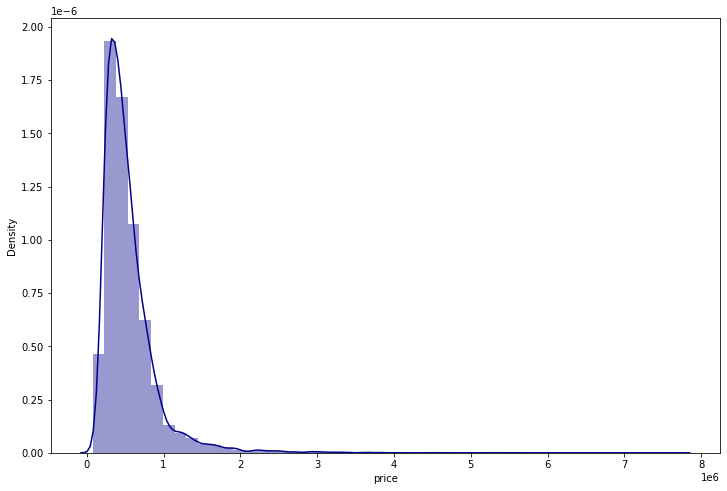

In [31]:
plt.figure(figsize = (12,8))
sns.distplot(df.price, color = 'darkblue')
plt.show()

In [32]:
df.price.skew()

4.024069144684712

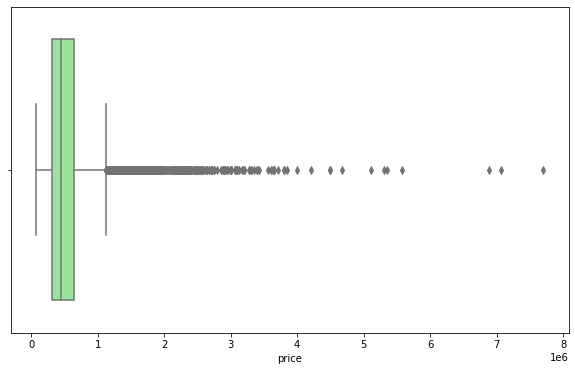

In [33]:
plt.figure(figsize = (10,6))
sns.boxplot(x = df.price, color = 'lightgreen')
plt.show()

We see that our price data is right-skewed. We know that it is normal for datasets with house prices. 

Lets analyze our outliers:

In [35]:
from scipy.stats import zscore
df['Z_price'] = zscore(df['price'])
round((df[['price', 'Z_price']]).describe(),2)

,price,Z_price
count,21613.00,21613.00
mean,540088.14,-0.00
std,367127.20,1.00
min,75000.00,-1.27
25%,321950.00,-0.59
50%,450000.00,-0.25
75%,645000.00,0.29
max,7700000.00,19.50


In [36]:
df_out = df[df['Z_price'] > 3]
df_out[['price', 'Z_price']]

,price,Z_price
21,2000000.0,3.976675
153,2250000.0,4.657654
246,2400000.0,5.066241
269,2900000.0,6.428198
282,2050000.0,4.112871
...,...,...
21514,1865000.0,3.608947
21530,3000000.0,6.700590
21540,1881580.0,3.654109
21568,1700000.0,3.159501


We have 406 prices outliers where prices are higher then mean + 3std for 21613 records

Lets get correlation info and pairplots for our whole datasets and get some insights from them:

Correlation analysis for our dataset:

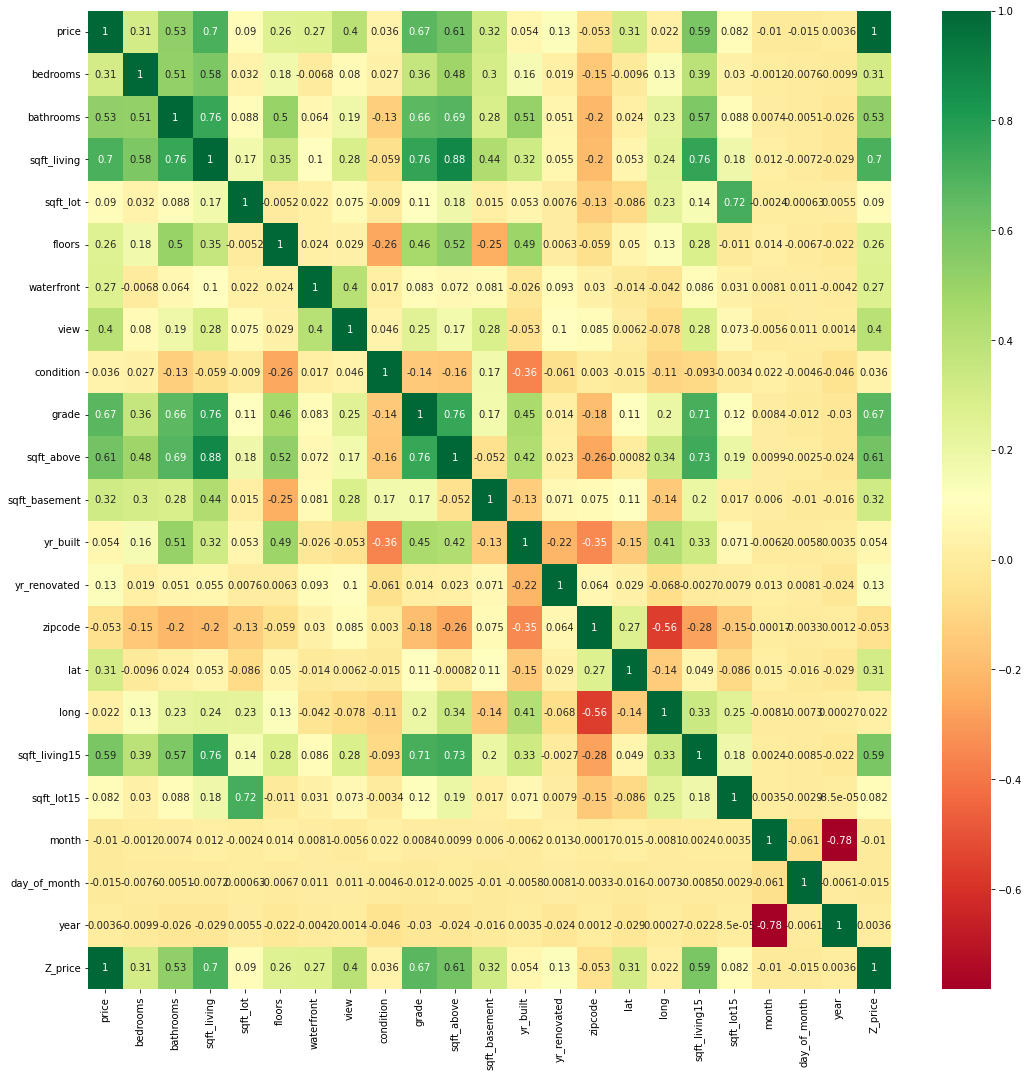

In [37]:
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')
plt.show()

In [38]:
df.corr()['price'].sort_values(ascending = False)

Z_price          1.000000
price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525714
view             0.397293
sqft_basement    0.323816
bedrooms         0.308868
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
year             0.003576
month           -0.010081
day_of_month    -0.014670
zipcode         -0.053203
Name: price, dtype: float64

In [39]:
features = df.corr()['price'].sort_values(ascending = False)

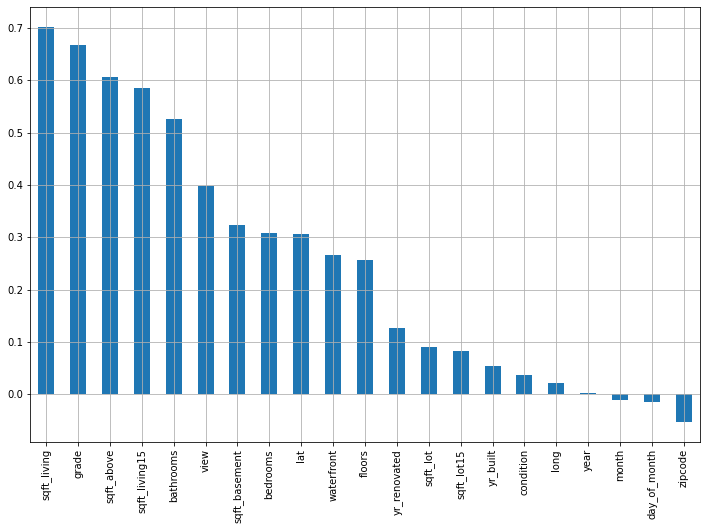

In [41]:
plt.figure(figsize = (12,8))
features[2:].plot(kind = 'bar')
plt.grid()
plt.show()

We can stay with df columns which have correlation coefficient > 0.1

In [43]:
new_df = df[['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'view', 'sqft_basement', 'bedrooms', 'lat', 'waterfront', 'floors', 'yr_renovated', 'price']]
new_df.head()

,sqft_living,grade,sqft_above,sqft_living15,bathrooms,view,sqft_basement,bedrooms,lat,waterfront,floors,yr_renovated,price
0,1180,7,1180,1340,1.00,0,0,3.0,47.5112,0,1.0,0,221900.0
1,2570,7,2170,1690,2.25,0,400,3.0,47.7210,0,2.0,1991,538000.0
2,770,6,770,2720,1.00,0,0,2.0,47.7379,0,1.0,0,180000.0
3,1960,7,1050,1360,3.00,0,910,4.0,47.5208,0,1.0,0,604000.0
4,1680,8,1680,1800,2.00,0,0,3.0,47.6168,0,1.0,0,510000.0


In [44]:
new_df.to_csv('cleaned_df.csv')

Lets draw pair plots:

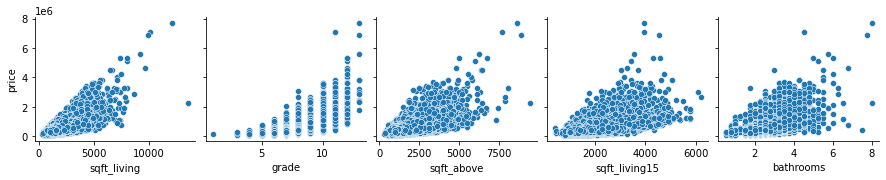

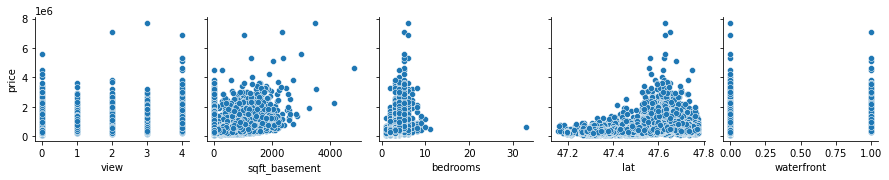

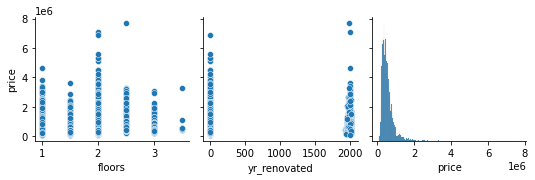

In [45]:
for i in range(0, len(new_df.columns), 5):
    sns.pairplot(data=new_df,
                x_vars=new_df.columns[i:i+5],
                y_vars=['price'])

### 4. Hypothesis testing

Lets perform a statistical analysis for waterfront parameter. Does it influence to our house prices?

In [50]:
print('Mean price grouped by waterfront parameter:')
print(new_df.groupby('waterfront')['price'].mean())
print('')
print('Median price grouped by waterfront parameter:')
print(new_df.groupby('waterfront')['price'].median())

Mean price grouped by waterfront parameter:
waterfront
0    5.315636e+05
1    1.661876e+06
Name: price, dtype: float64

Median price grouped by waterfront parameter:
waterfront
0     450000.0
1    1400000.0
Name: price, dtype: float64


1. Lets see how boxplot and distplot are looking: 

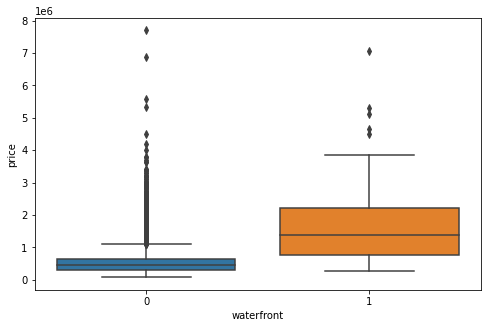

In [51]:
plt.figure(figsize = (8,5))
sns.boxplot(data = new_df, x = 'waterfront', y = 'price')
plt.show()

We see that quartile ranges of prices for houses with waterfront and without are different, but houses w/o waterfront view have much more outliers, lets check distribution in other way: 

C:\Users\PNarnov\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\PNarnov\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


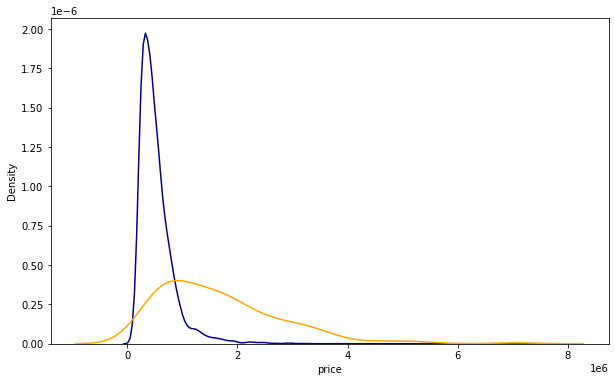

In [52]:
WoWF = new_df[new_df['waterfront'] == 0]
WF = new_df[new_df['waterfront'] == 1]
plt.figure(figsize = (10,6))
sns.distplot(WoWF.price, color = 'darkblue', hist = False)
sns.distplot(WF.price, color = 'orange', hist = False)
plt.show()

We see 2 different distribitions with Max density values near each other:   
Our Null hypothesis will be: There is no any correlation with waterfront and house price.   
Our Alt hypothesis will be: There is some correlation
Lets perform a statistical analysis:

Firstly we fix our distributions to be looking as normal for analysis:

C:\Users\PNarnov\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\PNarnov\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


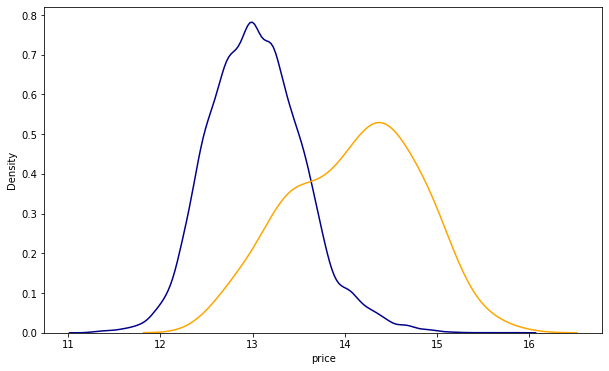

In [53]:
plt.figure(figsize = (10,6))
sns.distplot(np.log(WoWF.price), color = 'darkblue', hist = False)
sns.distplot(np.log(WF.price), color = 'orange', hist = False)
plt.show()

Now they look better and we can compare prices for different categories

In [54]:
import scipy.stats as stats 

In [55]:
alpha=0.05
t_value1, p_value1 = stats.ttest_ind(np.log(WF.price), np.log(WoWF.price))
print("t_value1 = ",t_value1, ", p_value1 = ", p_value1)

t_value1 =  26.065687913630512 , p_value1 =  1.6959013227359578e-147


In [56]:
if p_value1 < alpha:
    print("Conclusion: since p_value {} is less than alpha {} ". format (p_value1,alpha))
    print("Reject the null hypothesis that there is no effect of waterfront on house prices.")
    
else:
    print("Conclusion: since p_value {} is greater than alpha {} ". format (p_value1,alpha))
    print("Fail to reject the null hypothesis that there is no effect of waterfront on house prices.")

Conclusion: since p_value 1.6959013227359578e-147 is less than alpha 0.05 
Reject the null hypothesis that there is no effect of waterfront on house prices.


So we can conclude that there is some effect of waterfront on house prices.

We have day of week parameter which we haven't analyzed yet:

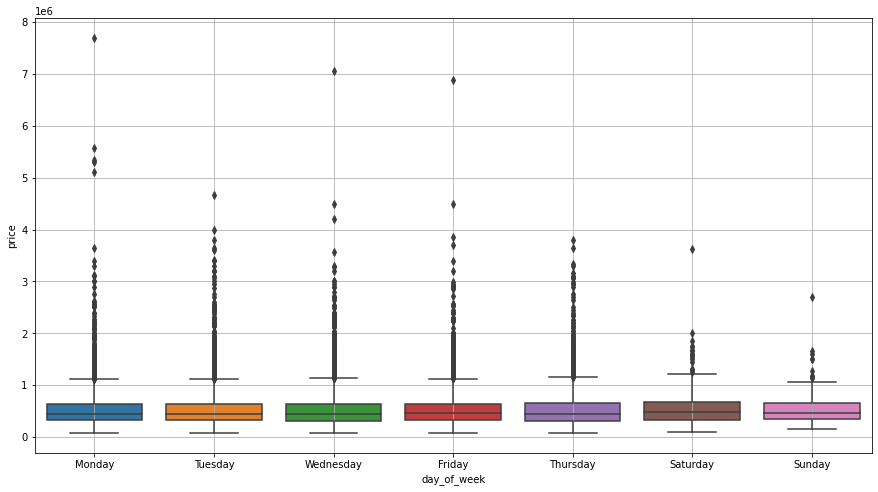

In [59]:
plt.figure(figsize = (15,8))
sns.boxplot(data = df, x = 'day_of_week', y = 'price')
plt.grid()
plt.show()

Boxplot looks like there is no effect of day of week on price.
Lets check it!

H0: There is no effect of day of week on price.   
H1: There is an effect

In [60]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm 

In [62]:
formula = 'price ~ C(day_of_week)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(day_of_week),6.0,6.046927e+11,1.007821e+11,0.747687,0.611198
Residual,21606.0,2.912312e+15,1.347918e+11,NaN,NaN


Our P value in this test is 0.61 and it is greater then 0.05 so we can't reject our null hypothesis for this survey 

### 5. Conclusions:

We performed Data cleaning, data engineering, EDA and hypothesis testing for this dataset.   
Now it is ready for futher ML analysis which will be a next working step for this dataset.   
The dataset has enought examples to perform proper model fitting and additional data is not needed.